 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Prior to analysis we'll cleanse and organize the data, ensuring consistency across initially disparate datasets. This entails the following...
1. Initially reading the individual csv files to identify date formatting, ascending or descending order, nulls, value formats (string, float, int, etc), etc
2. Making necessary edits to streamline across datafiles, i.e. uniformly setting the date index, ensuring values are floats and removing nulls
3. Ensuring values (closing prices versus daily change in closing prices) are consistent
4. Observing date ranges to QA charts and to ensure aggregating additional are consistent with the combined datasets date-range

In [2]:
# Reading whale returns
# YOUR CODE HERE
whale_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algocsv = Path("algo_returns.csv")
algo_df = pd.read_csv(algocsv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500csv = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500csv, index_col = "Date", infer_datetime_format = True, parse_dates=True)
sp500_df.sort_index(inplace=True)
#sp500_df.to_csv("sp500test.csv", index=True)
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls and valiadate
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()
# Rename Column - **renamed after concatenating

Close    0
dtype: int64

In [13]:
# Rename Column - **renamed after concatenating

## Combine Whale, Algorithmic, and S&P 500 Returns

In [33]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([sp500_df, algo_df, whale_df], axis = "columns", join = "inner")
#combined_df.to_csv("combined.csv")
combined_df = combined_df.rename(columns = {"Close": "sp_500"})
combined_df.tail()

,sp_500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-22,0.001012,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-23,0.008841,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278


In [110]:
# As an additional check, exporting smaller datasets such as these for viewing in excel can also serve as a way to ensure proper merging of dataframes
combined_df.to_csv("combined.csv")

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

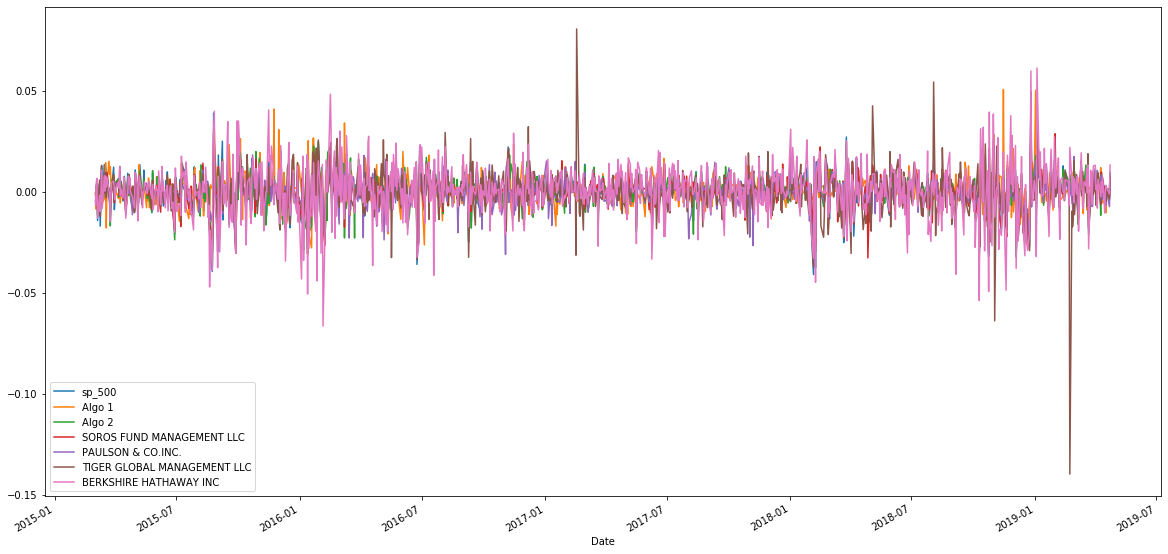

In [14]:
# Plot daily returns
combined_df.plot(figsize=(20,10))

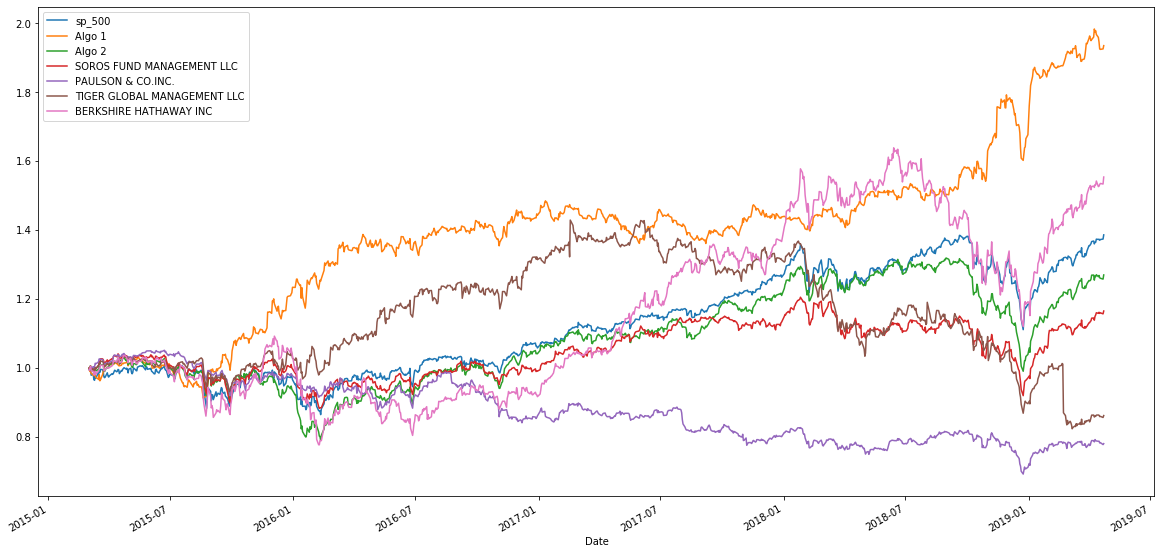

In [15]:
# Plot cumulative returns
cumulative_df = (1 + combined_df).cumprod()
cumulative_df.plot(figsize=(20,10))

## Summary Assessment of Returns
* Evaluating daily changes over large periods of time can be an exercise in futility as evidenced by the first unintelligible graph
* Looking at cumulative returns, only two portfolios outperform the S&P. Further evaluation in the context of risk tolerance is necessary but at face value, under-performing the S&P is generally considered a dissapointment** wordsmith

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Additional Context as a Guide to this Analysis
1. We'll begin scanning data in the form of a box plot in order to eyeball the variance in daily percent change of the various portfolios to better orient ourselves with the volatility of each portfolio, and help us ingest deeper layers of risk measurement as we work through this analysis
2. Std deviation will be the metric in which use as a proxy for risk both in the immediate section below and throughout

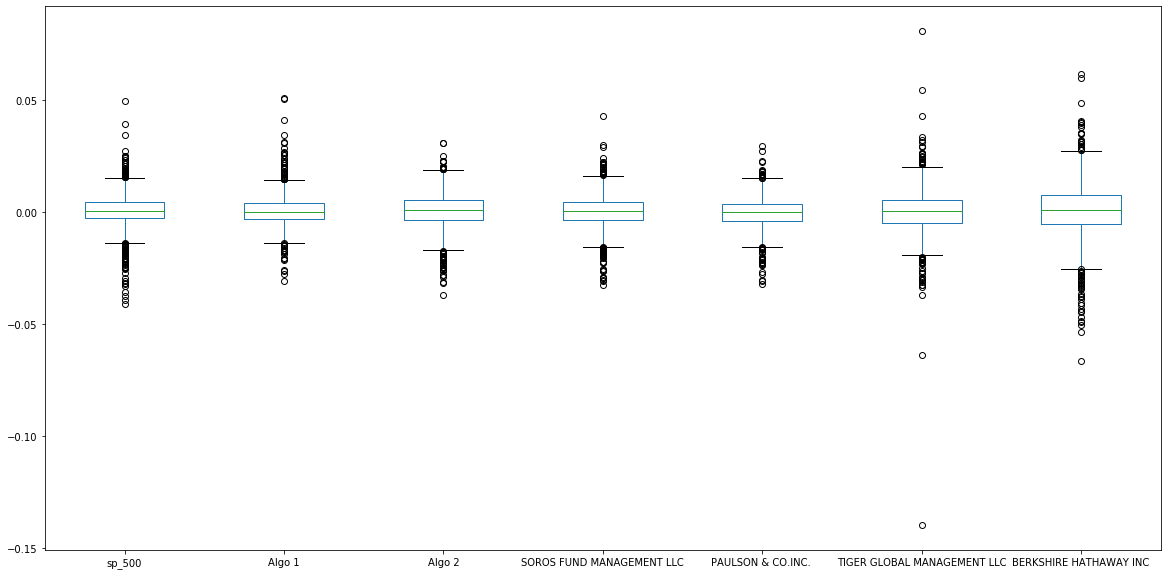

In [16]:
# Box plot to visually show risk 
combined_df.plot.box(figsize=(20,10))

In [111]:
# Daily Standard Deviations
# Which portfolios are riskier than the S&P 500?
combined_std = combined_df.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp_500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [112]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
sp_500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

## Summary Assessment of Risk
* Berkshire Hathaway and Tiger Global both exhibited considerably more volatility than the S&P


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

## Additional Notes for Analysis
* Plotting the rolling std. deviation allows us to eyeball the relationsip of the various portfolios against the S&P to better reconcile correlation and beta metrics
* It also provides the opportunity to identify patterns and outliers over times, with the Tiger fund being an obvious example of moving in extreme directions while the S&P and the rest of the pack mostly move lockstep with the S&P but at a lesser order of magnitude.

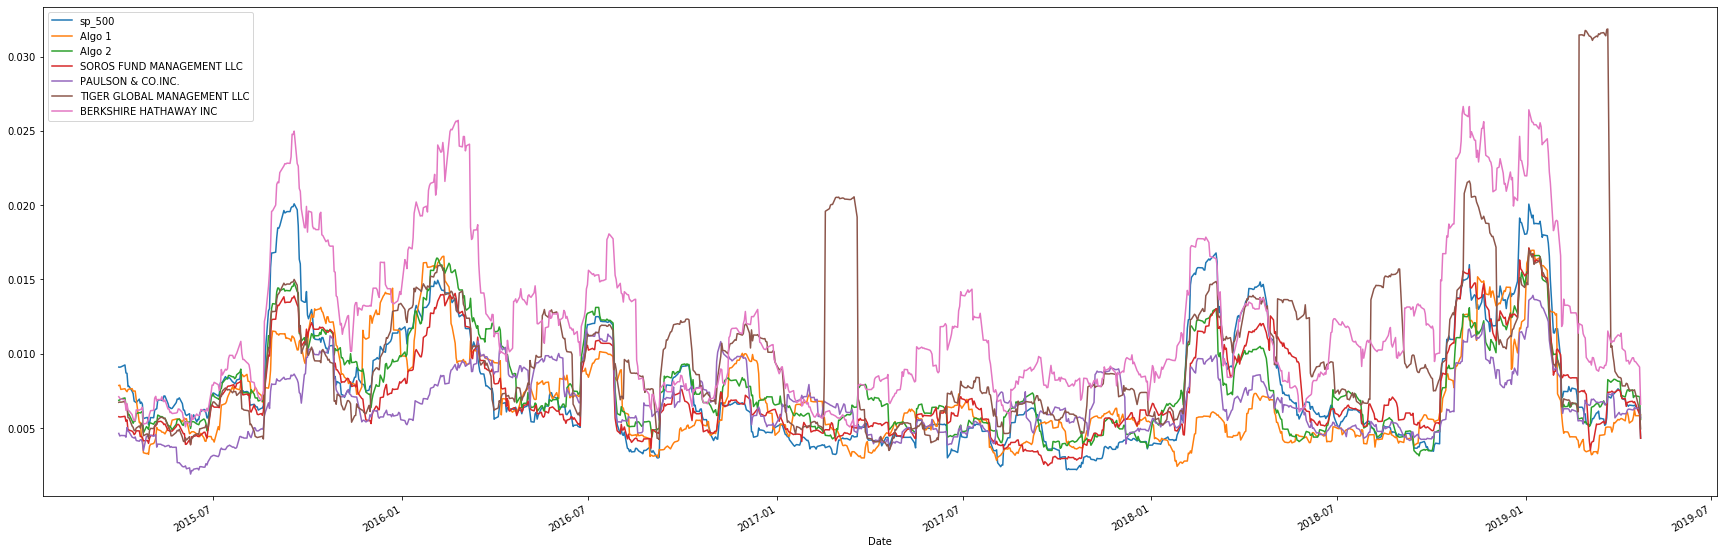

In [113]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(30,10))

In [23]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,sp_500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
sp_500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
algo1_covariance = combined_df['Algo 1'].cov(combined_df['sp_500'])
sp_variance = combined_df['sp_500'].var()
algo1_beta = algo1_covariance / sp_variance
algo1_beta

0.24899091459425748

In [26]:
rolling_algo1_covariance = combined_df['Algo 1'].rolling(window=21).cov(combined_df['sp_500'])
rolling_sp_variance = combined_df['sp_500'].rolling(window=21).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_sp_variance
rolling_algo1_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16   -0.056215
2019-04-17   -0.015315
2019-04-18   -0.065531
2019-04-22   -0.062526
2019-04-23    0.038336
Length: 1043, dtype: float64

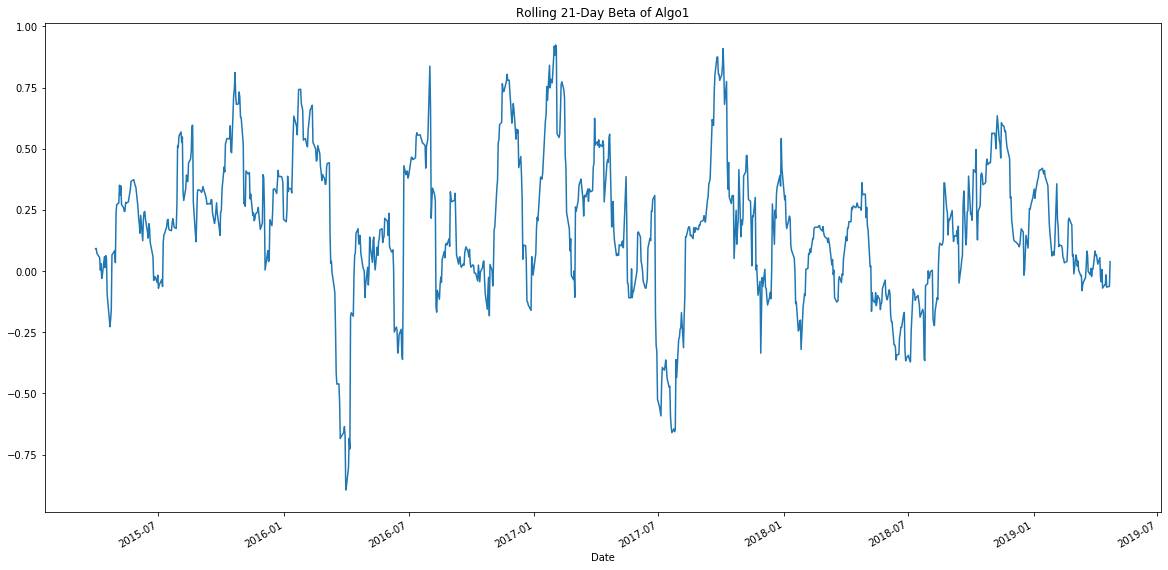

In [27]:
rolling_algo1_beta.plot(figsize=(20, 10), title = 'Rolling 21-Day Beta of Algo1')

## Summary Assesment of Rolling Metrics & Beta
* Scanning the box plot we can see that Algorithm 1 will serve as an interesting case study on risk and return. Algo 1 successfully mitigated risk better than all portfolios except for Paulsen, but coupled tha with both a higher frequency of positive days. Underscoring the notion of multiple small high days, and few down days will yield larger returns over time versus that of the Tiger fund, which swung excessively in both directions.
* Additionally, while largely a bull market over this date range, 

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

sp_500                         0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

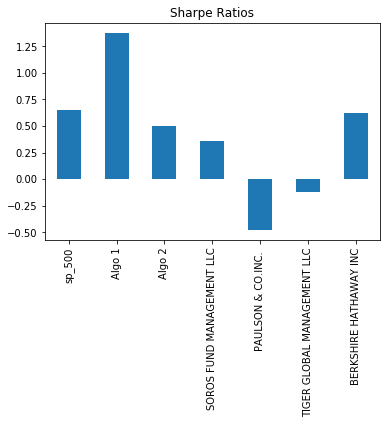

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Summary Assessment
* Not surprisingly, Algo 1 vastly exceeds the S&P and the rest of the portfolios when evaluating returns in the context of risk, that Sharpe ratios allow us to quickly understand

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

## Notes on ingesting these data sets
* Concatenation of this set has not been performed via the pivot technique as the starter code suggests, as it serves little purpose

* Columns have simply been renamed here for simpler (presumably) concatenation versus using the "pivot" method
* Similarly, also choosing to forego a "ticker symbol" column as it doesn't serve any purpose concerning this task at hand
* Data spans back two years from the end date (4/23/19) of the previously analyzed whale and algo portfolios

In [75]:
# Read the first stock - Gilead, ticker = "GILD"

gildcsv = Path("GILD.csv")
gild = pd.read_csv(gildcsv, index_col="Date", parse_dates=True, infer_datetime_format=True)

gild = gild.rename(columns={
    "Close": "gild"})
gild.head()

,gild
Date,
2017-04-24 16:00:00,66.25
2017-04-25 16:00:00,67.12
2017-04-26 16:00:00,68.22
2017-04-27 16:00:00,68.58
2017-04-28 16:00:00,68.55


In [76]:
# Read the second stock - Microsoft, ticker = "MSFT"
msftcsv = Path("MSFT.csv")
msft = pd.read_csv(msftcsv, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft = msft.rename(columns={
    "Close": "msft"})
msft.head()

,msft
Date,
2017-04-24 16:00:00,67.53
2017-04-25 16:00:00,67.92
2017-04-26 16:00:00,67.83
2017-04-27 16:00:00,68.27
2017-04-28 16:00:00,68.46


In [77]:
# Read the third stock - Paypal, ticker = "PYPL"
pyplcsv = Path("PYPL.csv")
pypl = pd.read_csv(pyplcsv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#pypl = pypl.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
pypl = pypl.rename(columns={
    "Close": "pypl"})
pypl.head()

,pypl
Date,
2017-04-24 16:00:00,44.27
2017-04-25 16:00:00,44.71
2017-04-26 16:00:00,44.41
2017-04-27 16:00:00,47.15
2017-04-28 16:00:00,47.72


In [78]:
# Concatenate all stocks into a single DataFrame - consolidating numerous steps below for a clean dataset, eschewing the pivot technique
my_port = pd.concat([pypl, msft, gild], axis = "columns", join = "inner")
my_port.to_csv("my_port.csv")
#combined_df.to_csv("combined.csv") - code to push a new csv file for an additional eyeball check
my_port.head()

,pypl,msft,gild
Date,,,
2017-04-24 16:00:00,44.27,67.53,66.25
2017-04-25 16:00:00,44.71,67.92,67.12
2017-04-26 16:00:00,44.41,67.83,68.22
2017-04-27 16:00:00,47.15,68.27,68.58
2017-04-28 16:00:00,47.72,68.46,68.55


In [94]:
# Reset the index and removing timestamp
my_port = my_port.reset_index()
my_port['Date'] = my_port['Date'].dt.date
my_port

,Date,pypl,msft,gild
0,2017-04-24,44.27,67.53,66.25
1,2017-04-25,44.71,67.92,67.12
2,2017-04-26,44.41,67.83,68.22
3,2017-04-27,47.15,68.27,68.58
4,2017-04-28,47.72,68.46,68.55
...,...,...,...,...
497,2019-04-15,108.14,121.05,65.43
498,2019-04-16,108.20,120.77,64.54
499,2019-04-17,108.81,121.77,63.25
500,2019-04-18,107.36,123.37,62.95


In [95]:
# Setting "Date" as the index
my_port.set_index(my_port['Date'], inplace=True)
my_port = my_port.drop(columns=["Date"])
my_port

,pypl,msft,gild
Date,,,
2017-04-24,44.27,67.53,66.25
2017-04-25,44.71,67.92,67.12
2017-04-26,44.41,67.83,68.22
2017-04-27,47.15,68.27,68.58
2017-04-28,47.72,68.46,68.55
...,...,...,...
2019-04-15,108.14,121.05,65.43
2019-04-16,108.20,120.77,64.54
2019-04-17,108.81,121.77,63.25


In [96]:
# Convert to daily percent change and drop nulls
my_port = my_port.pct_change()
my_port.dropna(inplace=True)
my_port.isnull().sum()

pypl    0
msft    0
gild    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [98]:
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]
gild_weight = 1/3
msft_weight = 1/3
pypl_weight = 1/3
portfolio_returns = gild_weight * my_port["gild"] + msft_weight * my_port["msft"] + pypl_weight * my_port["pypl"]
portfolio_returns.head()

Date
2017-04-25    0.009615
2017-04-26    0.002785
2017-04-27    0.024487
2017-04-28    0.004812
2017-05-01    0.001229
dtype: float64

In [99]:
#converting "portfolio_returns" from a series to a dataframe to concatenate with the "combined_df" dataframe, requires a few steps...
#1. converting to a dataframe with the "to_frame" function and resetting the index
#2. Naming the columns "Date" and "Custom"
#3. Setting the "Date" as the index
portfolio_returns = portfolio_returns.to_frame().reset_index()
portfolio_returns.columns = ["Date", "Custom"]
portfolio_returns.set_index(portfolio_returns['Date'], inplace=True)
portfolio_returns = portfolio_returns.drop(columns=["Date"])
portfolio_returns.head()

,Custom
Date,
2017-04-25,0.009615
2017-04-26,0.002785
2017-04-27,0.024487
2017-04-28,0.004812
2017-05-01,0.001229


## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_ports = pd.concat([portfolio_returns, combined_df], axis = "columns", join = "inner")
all_ports.to_csv("all_ports.csv")
all_ports.head()

,Custom,sp_500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2017-04-25,0.009615,0.006095,0.008136,0.006739,0.005335,-0.000904,-0.000303,0.007220
2017-04-26,0.002785,-0.000490,-0.005080,0.004459,0.003868,0.006180,-0.010733,0.010105
2017-04-27,0.024487,0.000553,-0.005333,-0.001183,0.002225,0.004637,-0.001710,0.000822
2017-04-28,0.004812,-0.001913,0.004049,-0.006033,-0.000972,-0.000331,-0.005298,-0.005322
2017-05-01,0.001229,0.001732,-0.010498,0.002969,0.001192,0.001822,-0.007842,0.009554


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_ports.dropna(inplace=True)
all_ports.isnull().sum()

Custom                         0
sp_500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

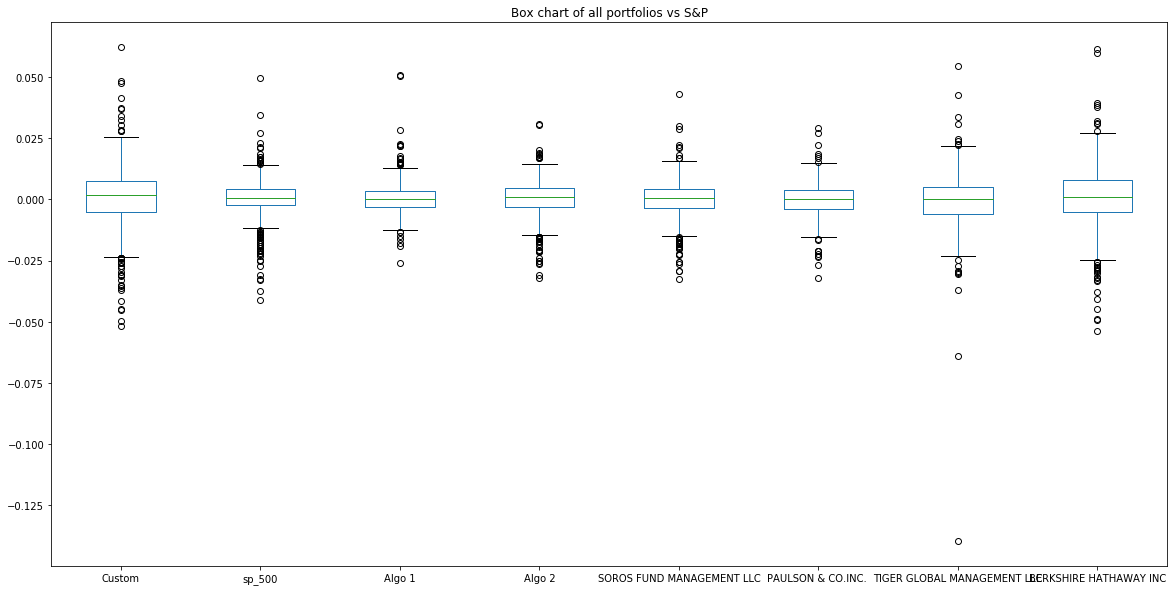

In [102]:
# Risk
all_ports.plot.box(figsize=(20, 10), title = 'Box chart of all portfolios vs S&P')
                   

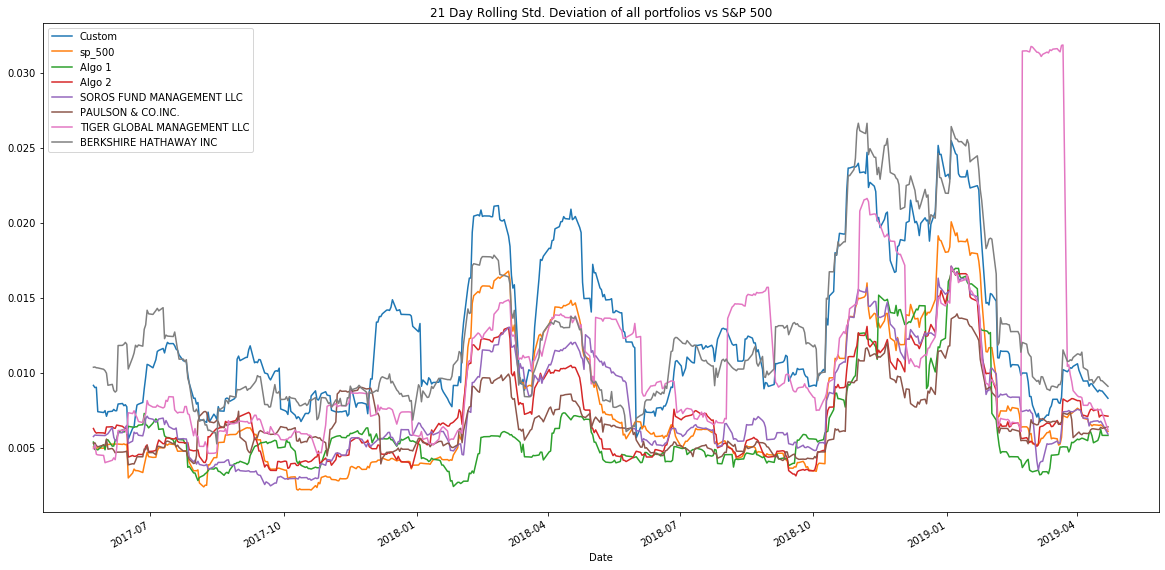

In [103]:
# Rolling
all_ports.rolling(window=21).std().plot(figsize=(20, 10), title = '21 Day Rolling Std. Deviation of all portfolios vs S&P 500')

In [106]:
# Beta - Aggregate
#1 - calculate covariance against SP500 of the custom portfolio
custom_covariance = all_ports['Custom'].cov(all_ports['sp_500'])
sp_variance2 = all_ports['sp_500'].var()
custom_beta = custom_covariance / sp_variance2
custom_beta

1.2730774676041912

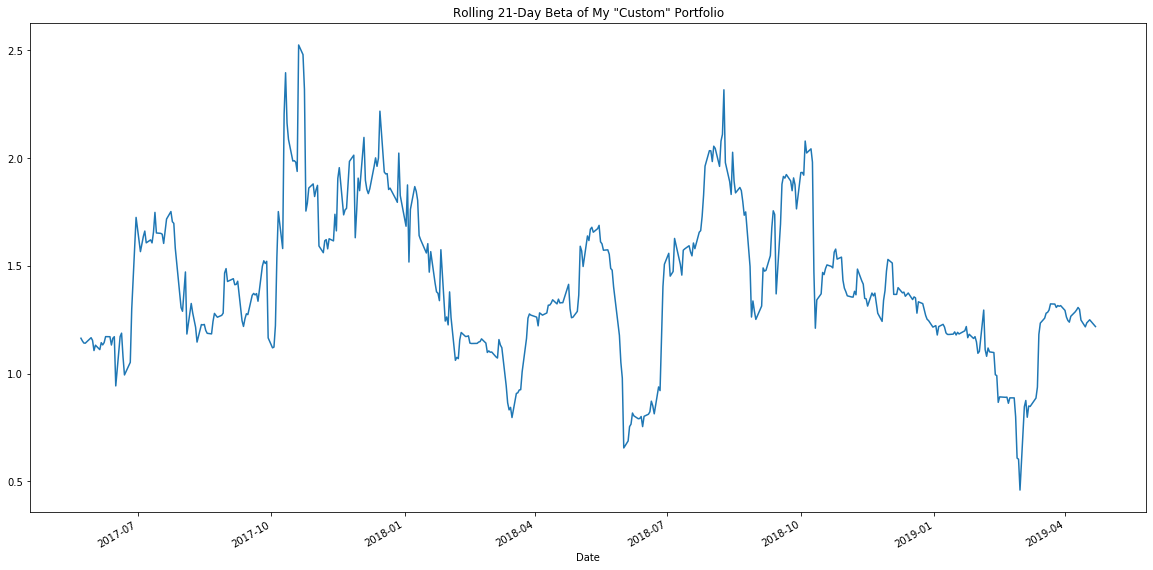

In [107]:
# Beta - 21 Day Rolling Graph
#1 - calculate covariance against SP500 of the custom portfolio
rolling_custom_covariance = all_ports['Custom'].rolling(window=21).cov(all_ports['sp_500'])
rolling_sp_variance2 = all_ports['sp_500'].rolling(window=21).var()
rolling_custom_beta = rolling_custom_covariance / rolling_sp_variance2
graph =rolling_custom_beta.plot(figsize=(20, 10), title = 'Rolling 21-Day Beta of My "Custom" Portfolio')

In [108]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (all_ports.mean() * 252) / (all_ports.std() * np.sqrt(252))
sharpe_ratios_all

Custom                         1.297169
sp_500                         0.817800
Algo 1                         1.408632
Algo 2                         0.621272
SOROS FUND MANAGEMENT LLC      0.374885
PAULSON & CO.INC.             -0.407489
TIGER GLOBAL MANAGEMENT LLC   -1.189216
BERKSHIRE HATHAWAY INC         0.922233
dtype: float64

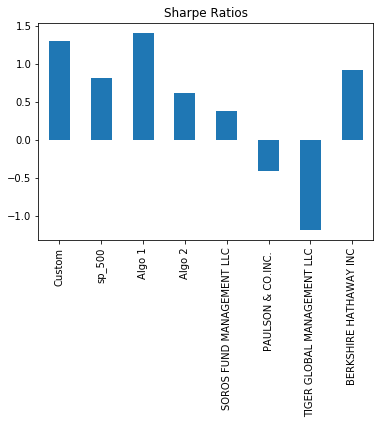

In [109]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [104]:
my_port_correlation = my_port.corr()
my_port_correlation

,pypl,msft,gild
pypl,1.000000,0.668552,0.339121
msft,0.668552,1.000000,0.420751
gild,0.339121,0.420751,1.000000


## Summary Analyis of the Custom Portfolio
* The custom portfolio simply contains a few strong performers in the context of the S&P, and is thus highly correlated and with a slighly higher beta than 1, outperforms the S&P accordingly.
* Looking at the box plot and more deeply at the std. deviation (found below), the custom portfolio underwhelms in risk mitigation but given the relatively outsized returns, still yields the second highest Sharpe ratio behind Algo 1
* A deeper look inside the portfolio, reveals MSFT and PYPL highly correlated with an R^2 of .67, while none of the other pairs are above .50


In [115]:
all_ports_std = all_ports.std()
all_ports_std = all_ports_std.sort_values(ascending=False)
all_ports_std

Custom                         0.013201
BERKSHIRE HATHAWAY INC         0.013124
TIGER GLOBAL MANAGEMENT LLC    0.011969
sp_500                         0.008574
SOROS FUND MANAGEMENT LLC      0.008211
Algo 2                         0.007780
PAULSON & CO.INC.              0.006941
Algo 1                         0.006935
dtype: float64